In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data= pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.dropna(inplace=True)

In [10]:
from sklearn.model_selection import train_test_split
X=data.drop(['median_house_value'],axis=1)
y= data['median_house_value']

In [11]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2)

In [12]:
train_data= X_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
11525,-118.05,33.72,22.0,5416.0,1271.0,2260.0,1184.0,3.8038,<1H OCEAN,174500.0
18684,-121.82,36.95,16.0,2599.0,430.0,1417.0,445.0,4.6611,<1H OCEAN,349300.0
5271,-118.52,34.04,42.0,993.0,130.0,368.0,134.0,10.8082,<1H OCEAN,500001.0
5900,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,<1H OCEAN,218300.0
19107,-122.66,38.27,16.0,1523.0,308.0,477.0,315.0,2.1696,<1H OCEAN,75000.0
...,...,...,...,...,...,...,...,...,...,...
11682,-118.01,33.87,25.0,6348.0,1615.0,4188.0,1497.0,3.1390,<1H OCEAN,185700.0
12196,-117.43,33.55,8.0,446.0,62.0,188.0,68.0,9.4356,<1H OCEAN,465600.0
2628,-124.14,40.67,23.0,580.0,117.0,320.0,109.0,4.2054,NEAR OCEAN,130600.0
13465,-117.37,34.13,12.0,1893.0,493.0,1054.0,389.0,2.3456,INLAND,140800.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

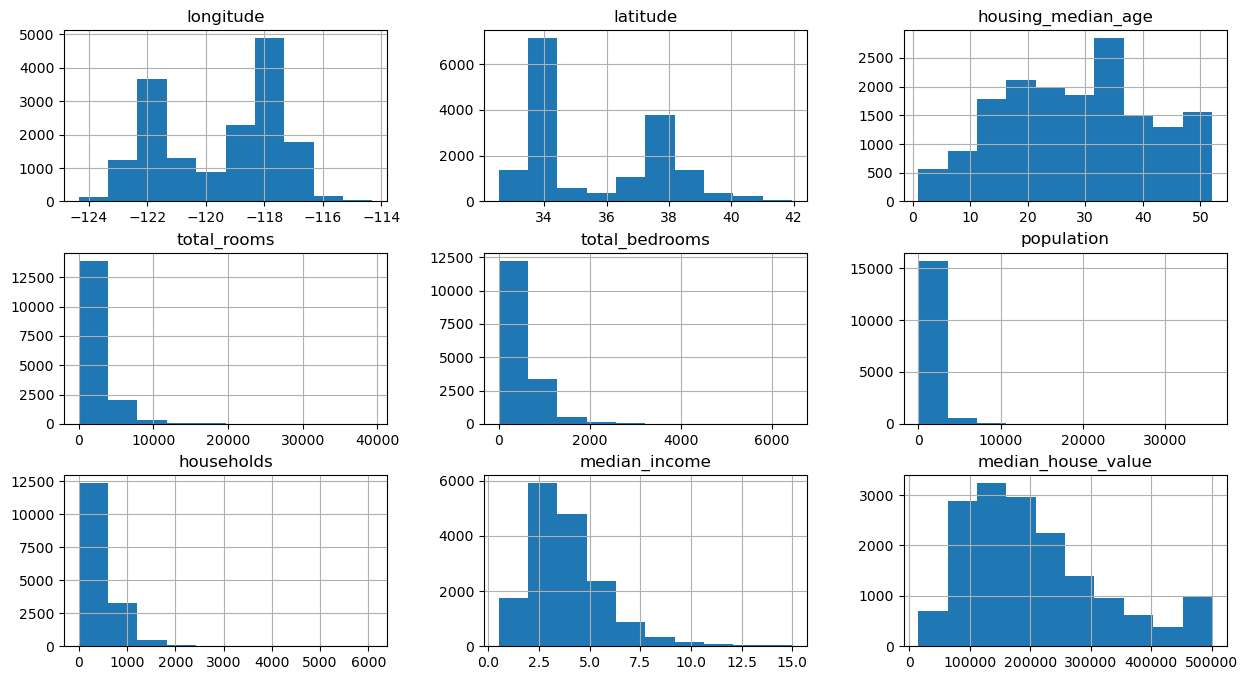

In [15]:
train_data.hist(figsize=(15,8))

In [18]:

train_data['total_rooms']= np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']= np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

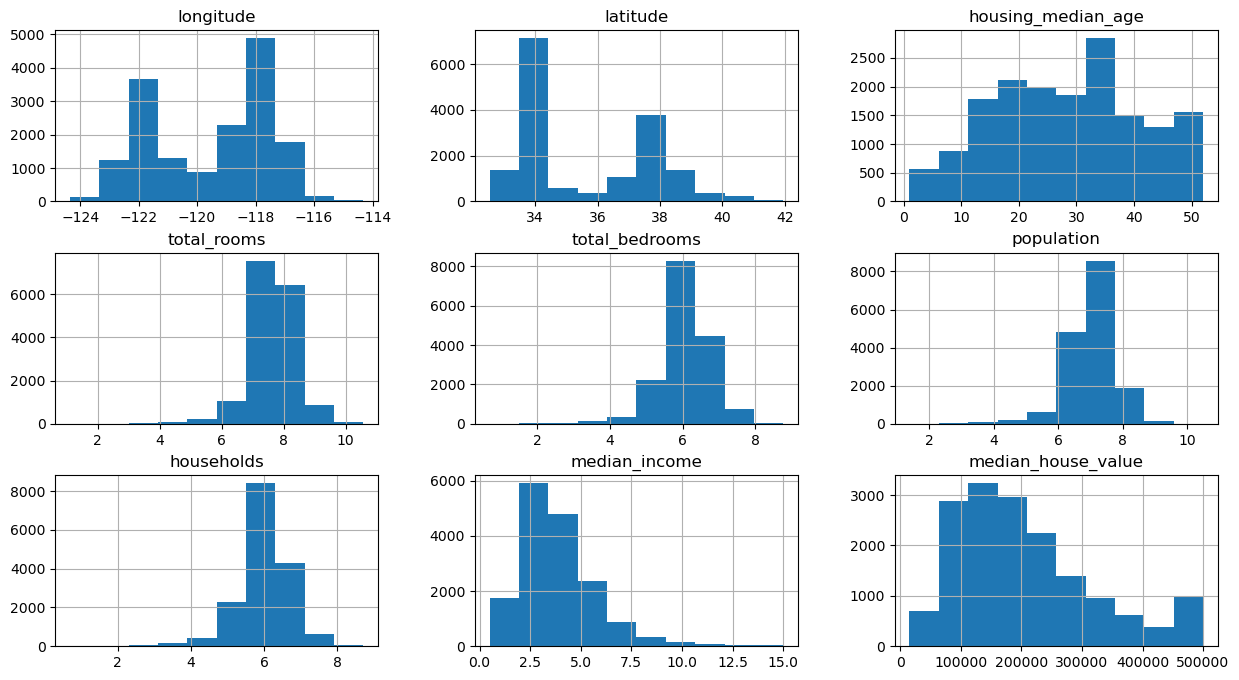

In [19]:
train_data.hist(figsize=(15,8))

In [23]:
train_data= train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
11525,-118.05,33.72,22.0,8.597297,7.148346,7.723562,7.077498,3.8038,174500.0,True,False,False,False,False
18684,-121.82,36.95,16.0,7.863267,6.066108,7.257003,6.100319,4.6611,349300.0,True,False,False,False,False
5271,-118.52,34.04,42.0,6.901737,4.875197,5.910797,4.905275,10.8082,500001.0,True,False,False,False,False
5900,-118.31,34.17,12.0,8.067463,6.837333,7.658700,6.746412,3.1823,218300.0,True,False,False,False,False
19107,-122.66,38.27,16.0,7.329094,5.733341,6.169611,5.755742,2.1696,75000.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11682,-118.01,33.87,25.0,8.756053,7.387709,8.340217,7.311886,3.1390,185700.0,True,False,False,False,False
12196,-117.43,33.55,8.0,6.102559,4.143135,5.241747,4.234107,9.4356,465600.0,True,False,False,False,False
2628,-124.14,40.67,23.0,6.364751,4.770685,5.771441,4.700480,4.2054,130600.0,False,False,False,False,True
13465,-117.37,34.13,12.0,7.546446,6.202536,6.961296,5.966147,2.3456,140800.0,False,True,False,False,False


<Axes: >

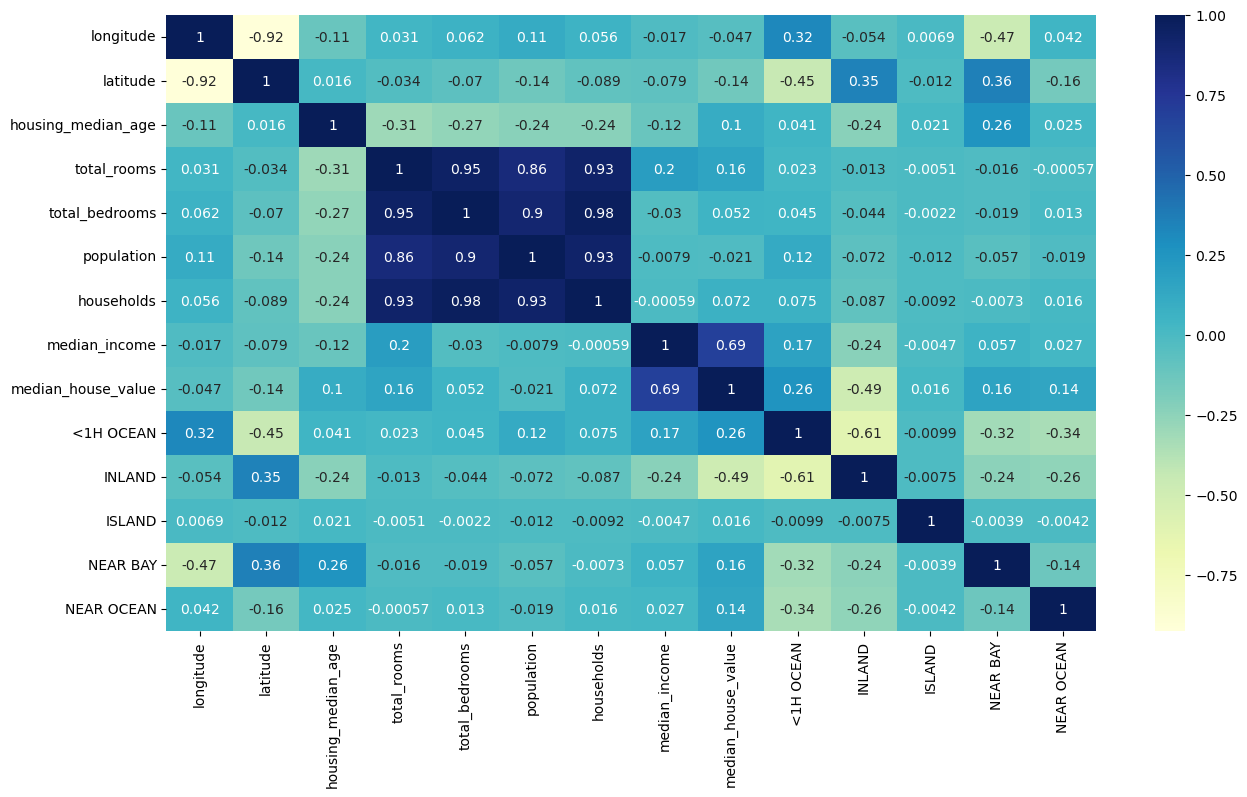

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True, cmap= "YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

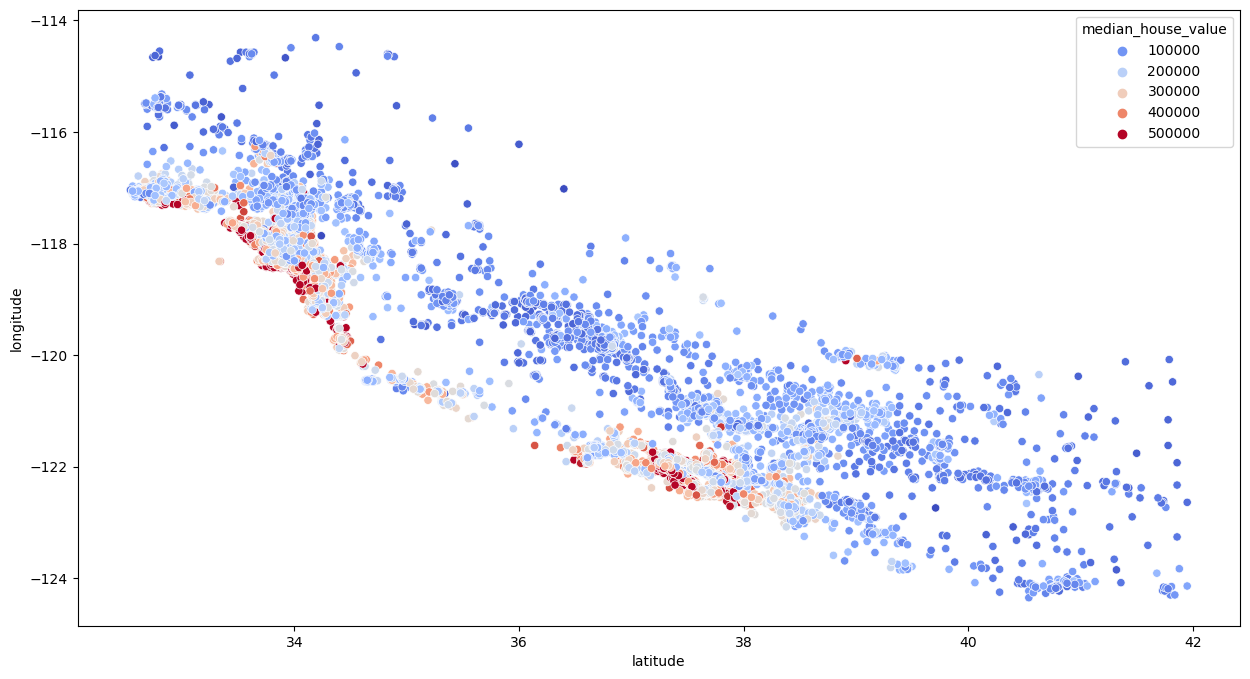

In [29]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude", data= train_data,hue= "median_house_value",palette= "coolwarm")

In [30]:
train_data['bedroom_ratio']= train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']= train_data['total_rooms']/train_data['households']

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train, y_train= train_data.drop(['median_house_value'],axis=1),train_data['median_house_value']
X_train_s= scaler.fit_transform(X_train)


reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [38]:
LinearRegression()

LinearRegression()

In [70]:
test_data= X_test.join(y_test)

test_data['total_rooms']= np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']= np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data= test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)
test_data['bedroom_ratio']= test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']= test_data['total_rooms']/test_data['households']


AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [33]:
X_test, y_test= test_data.drop(['median_house_value'],axis=1),test_data['median_house_value']

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
18685,-121.83,37.02,22.0,7.551712,5.860786,6.634633,5.777652,2.9559,288400.0,True,False,False,False,False,0.776087,1.307055
9019,-118.78,34.16,9.0,10.322395,8.317278,9.462965,8.276903,8.0137,399200.0,False,False,False,False,True,0.805751,1.247132
15303,-117.36,33.17,24.0,7.624131,6.093570,6.700731,5.908083,2.3182,500001.0,False,False,False,False,True,0.799248,1.290458
19403,-120.93,37.72,18.0,5.971262,4.276666,5.513429,4.276666,4.3864,179500.0,False,True,False,False,False,0.716208,1.396242
14467,-117.25,32.84,19.0,7.473069,5.370638,6.492240,5.278115,10.7751,500001.0,False,False,False,False,True,0.718666,1.415860
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16607,-120.63,35.59,9.0,8.662678,7.077498,8.015327,7.030857,2.6528,113500.0,True,False,False,False,False,0.817010,1.232094
17142,-122.18,37.45,43.0,7.631432,6.082219,6.706862,5.955837,4.4688,460200.0,False,False,False,True,False,0.796996,1.281336
5603,-118.28,33.79,36.0,7.595890,6.129050,7.419980,6.122493,3.3009,168000.0,True,False,False,False,False,0.806890,1.240653
5299,-118.45,34.07,13.0,8.362876,7.281386,8.244597,7.133296,1.3125,350000.0,True,False,False,False,False,0.870680,1.172372


In [44]:
X_test_s = scaler.transform(X_test)

In [40]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
11525,-118.05,33.72,22.0,8.597297,7.148346,7.723562,7.077498,3.8038,True,False,False,False,False,0.831464,1.214737
18684,-121.82,36.95,16.0,7.863267,6.066108,7.257003,6.100319,4.6611,True,False,False,False,False,0.771449,1.288993
5271,-118.52,34.04,42.0,6.901737,4.875197,5.910797,4.905275,10.8082,True,False,False,False,False,0.706372,1.407003
5900,-118.31,34.17,12.0,8.067463,6.837333,7.658700,6.746412,3.1823,True,False,False,False,False,0.847520,1.195815
19107,-122.66,38.27,16.0,7.329094,5.733341,6.169611,5.755742,2.1696,True,False,False,False,False,0.782272,1.273353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11682,-118.01,33.87,25.0,8.756053,7.387709,8.340217,7.311886,3.1390,True,False,False,False,False,0.843726,1.197509
12196,-117.43,33.55,8.0,6.102559,4.143135,5.241747,4.234107,9.4356,True,False,False,False,False,0.678918,1.441286
2628,-124.14,40.67,23.0,6.364751,4.770685,5.771441,4.700480,4.2054,False,False,False,False,True,0.749548,1.354064
13465,-117.37,34.13,12.0,7.546446,6.202536,6.961296,5.966147,2.3456,False,True,False,False,False,0.821915,1.264878


In [41]:
reg.score(X_test,y_test)

0.6758009708684936

In [47]:
from sklearn.ensemble import RandomForestRegressor
forest= RandomForestRegressor()

forest.fit(X_train,y_train)

RandomForestRegressor()

In [51]:
forest.score(X_test,y_test)

0.8093433585811153

In [ ]:
from sklearn.model_selection import GridSearchCV
forest= RandomForestRegressor()
param_grid= {
    "n_estimators": [30,50,100],
    "max_features": [8,12,200],
    "min_samples_split": [2,4,6,8]
}

grid_search= GridSearchCV(forest, param_grid,cv= 5, 
                          scoring= "neg_mean_squared_error",
                          return_train_score= True)

grid_search.fit(X_train_s,y_train)

In [69]:
best_forest = grid_search.best_estimator_

In [ ]:
best_forest.score(X_test_s,y_test)

In [ ]:
RandomForestRegressor(n_estimators=200)